# Texture Generation using Random Noise
Get in touch with generative computing doing shaders usied in computer graphics

## Lode's Computer Graphics Tutorial
found at https://lodev.org/cgtutor/randomnoise.html


## Noise

In [241]:
import numpy as np

noiseWidth = 128
noiseHeight = 128
#noise = np.random.normal(0,1,100)
noise = np.random.rand(noiseWidth, noiseHeight)

In [242]:
import matplotlib.pyplot as plt

def show_image(b) :
    a = b
    a = np.expand_dims(a, axis = 2)
    a = np.concatenate((a, a, a), axis = 2)
    print(a.shape)
    # (128, 128, 3)
    plt.imshow(a)
    plt.show()

(128, 128, 3)


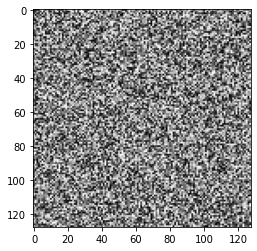

In [243]:
show_image(noise)

## Smooth noise

In [244]:
from math import modf
def smooth_noise(x, y):
   # get fractional part of x and y
   fractX = modf(x)[0]
   fractY = modf(y)[0]

   # wrap around
   x1 = (int(modf(x)[1]) + noiseWidth) % noiseWidth
   y1 = (int(modf(y)[1]) + noiseHeight) % noiseHeight

   # neighbor values
   x2 = (x1 + noiseWidth - 1) % noiseWidth
   y2 = (y1 + noiseHeight - 1) % noiseHeight

   # smooth the noise with bilinear interpolation
   value = 0.0
   value += fractX * fractY * noise[y1][x1]
   value += (1 - fractX) * fractY * noise[y1][x2]
   value += fractX * (1 - fractY) * noise[y2][x1]
   value += (1 - fractX) * (1 - fractY) * noise[y2][x2]

   return value

In [245]:
def make_noise (noise_func):
    b = np.random.rand(noiseWidth, noiseHeight)
    for y in range(0, noiseHeight):
        for x in range(0, noiseWidth):
            b[y][x] = noise_func(x, y)
    return b

(128, 128, 3)


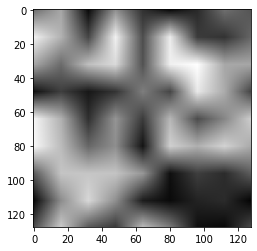

In [246]:
def smooth_noise_16(x, y):
    return smooth_noise(x / 16.0, y / 16.0)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(smooth_noise_16))

(128, 128, 3)


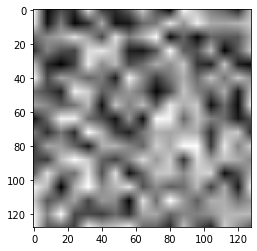

In [247]:
def smooth_noise_8(x, y):
    return smooth_noise(x / 8.0, y / 8.0)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(smooth_noise_8))

(128, 128, 3)


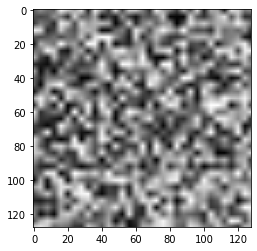

In [248]:
def smooth_noise_4(x, y):
    return smooth_noise(x / 4.0, y / 4.0)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(smooth_noise_4))

(128, 128, 3)


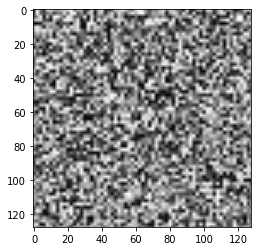

In [249]:
def smooth_noise_2(x, y):
    return smooth_noise(x / 2.0, y / 2.0)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(smooth_noise_2))

(128, 128, 3)


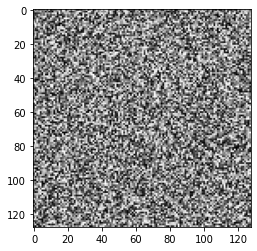

In [250]:
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(smooth_noise))

## Turbulence

In [251]:
def turbulence(x, y, size):
  value = 0.0
  initialSize = size

  while size >= 1:
    value += smooth_noise(x / size, y / size) * size
    size /= 2.0

  return (value / initialSize)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)


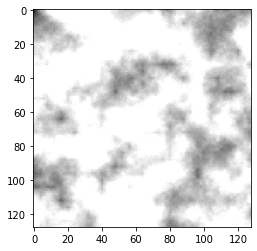

In [252]:
def turbulence_16(x, y):
    return turbulence(x, y, 16.0)
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(turbulence_16))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)


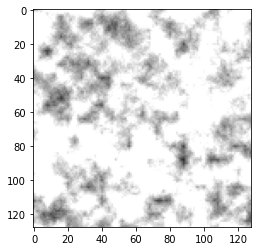

In [253]:
def turbulence_8(x, y):
    return turbulence(x, y, 8.0)
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(turbulence_8))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)


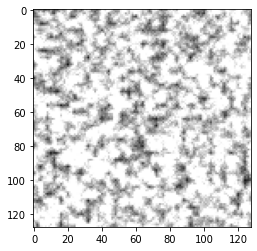

In [254]:
def turbulence_4(x, y):
    return turbulence(x, y, 4.0)
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(turbulence_4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)


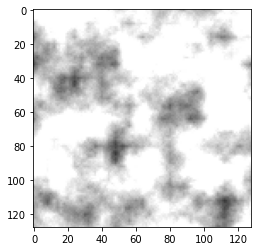

In [255]:
def turbulence_2(x, y):
    return turbulence(x, y, 2.0)
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(turbulence_16))

## Clouds
Use a trubolence with blue color (169-240) and lightness (intensity) (192..255)

## Marble

In [256]:
import math

def marble(x, y, xPeriod=5.0, yPeriod=10.0, turbulence_power=5.0, turbulence_size=32.0):
   xyValue = x * xPeriod / noiseWidth + y * yPeriod / noiseHeight + turbulence_power * turbulence(x, y,  turbulence_size)
   sine_value = abs(math.sin(xyValue * math.pi))
   return sine_value;

(128, 128, 3)


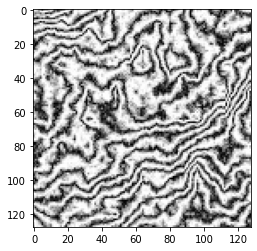

In [257]:
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(marble))

(128, 128, 3)


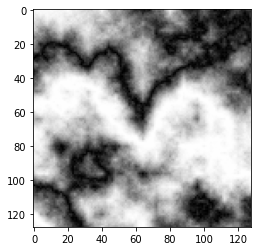

In [258]:
def marble_single(x, y):
    return marble(x, y, 0.0, 1.0, 1.0, 32.0)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(marble_single))    

(128, 128, 3)


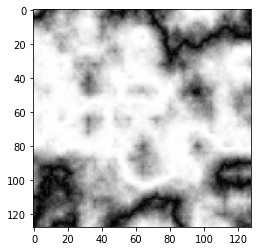

In [259]:
def marble_single_powered(x, y):
    return marble(x, y, 0.0, 1.0, 5.0, 32.0)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(marble_single_line))    

## Wood

In [264]:
import math

def wood(x, y, xy_period=12.0, turbulence_power=0.1, turbulence_size=32.0):
    xValue = (x - noiseWidth / 2.0) / float(noiseWidth)
    yValue = (y - noiseHeight / 2.0) / float(noiseHeight);
    distValue = math.sqrt(xValue * xValue + yValue * yValue) + turbulence_power * turbulence(x, y, turbulence_size);
    sine_value = 0.5 * abs(math.sin(2.0 * xy_period * distValue * math.pi));
    return sine_value;

(128, 128, 3)


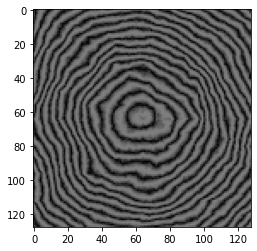

In [265]:
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(wood))

(128, 128, 3)


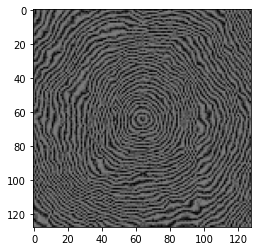

In [266]:
def wood_more_rings(x, y):
    return wood(x, y, 25.0)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(wood_more_rings))

(128, 128, 3)


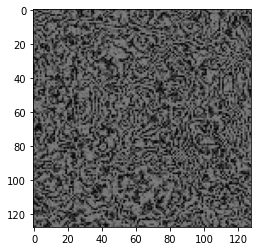

In [268]:
def wood_marble(x, y):
    return wood(x, y, turbulence_power=0.5)

noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(wood_marble))

# Sine pattern

In [278]:
import math

def material(x, y, xy_period=12.0, turbulence_power=0.1, turbulence_size=32.0):
    t_value = turbulence_power * turbulence(x, y, turbulence_size)
    x_value = (x - noiseWidth / 2.0) / float(noiseWidth) + t_value
    y_value = (y - noiseHeight / 2.0) / float(noiseHeight) + t_value
    sine_value = abs(math.sin(xy_period * x_value * math.pi) + math.sin(xy_period * y_value * math.pi))
    return sine_value;

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)


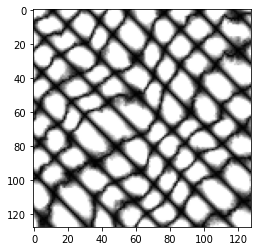

In [279]:
noise = np.random.rand(noiseWidth, noiseHeight)
show_image(make_noise(material))